# CAM

참고자료 : https://arxiv.org/abs/1512.04150

http://cnnlocalization.csail.mit.edu/Zhou_Learning_Deep_Features_CVPR_2016_paper.pdf

https://joungheekim.github.io/2020/09/29/paper-review/

CAM은 Class Activation Map을 뜻합니다. 단순화시켜 이야기 해보면 "model이 image의 어떤 곳을 보고, 어떤 class이라고 짐작하는지" 확인할 수 있는 지도이다. 

In [2]:
from IPython.display import Image

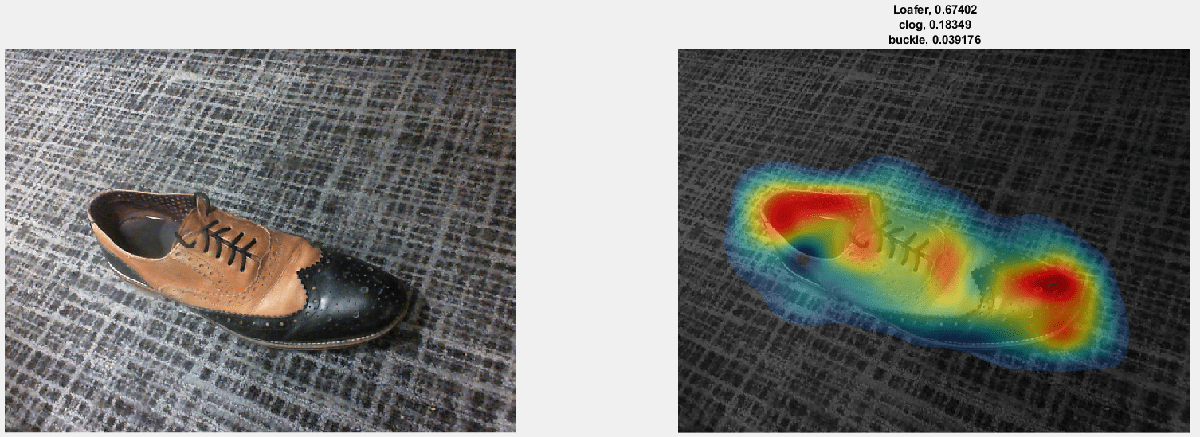

In [4]:
Image('./cam_1.png')

model이 image의 어떤 Feature을 보고, 해당 class라고 유추하는지 heatmap으로 나타낸 예시이다. CAM논문을 살펴보면, CAM을 얻기 위해 GAP을 사용했으며, 이를 통해서 어떤 class가 어느 영역에 의해서 활성화 되어있는지 알 수 있다.

# GAP

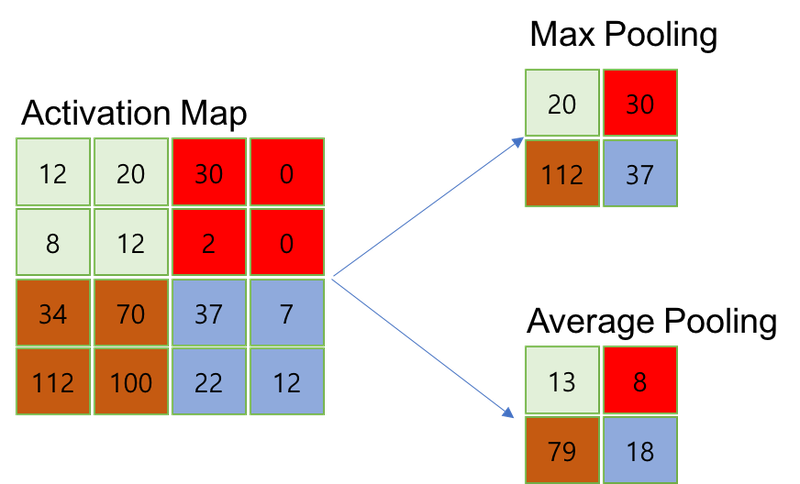

In [5]:
Image('./cam_2.png')

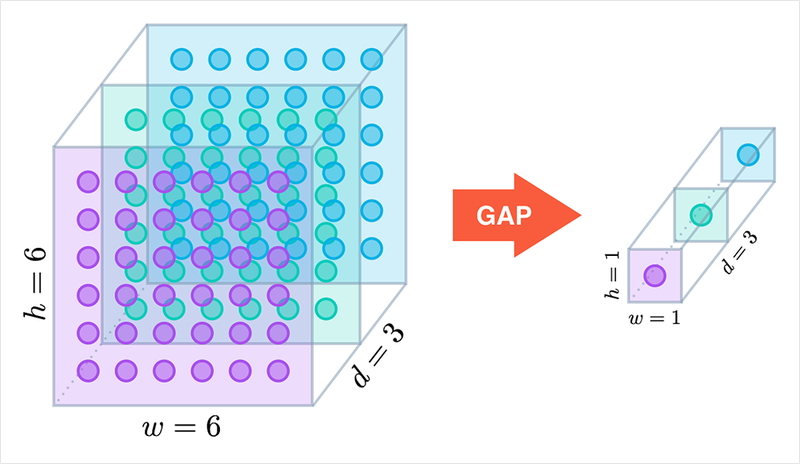

In [6]:
Image('./cam_3.png')

많이 들어본 Max Pooling은 kernal size안에 있는 원소 중 가장 큰 값이 대표값이 된다면, GAP는 kernal size안에 있는 평균값으로 대체된다. 위 그림에선 6x6 channel이 3인 feature map에 대해서 각 channel별 GAP의 연산을 수행 해 각 channel 별 1x1의 숫자로 요약되어 1x1크기의 channel 3개의 벡터를 얻게 된다.

아래 그림처럼 GAP연산을 한 다음, 연산 결과 벡터에 softmax activation 함수를 적용한다. 이때 마지막 layer의 channel 수는 데이터의 class수에 맞춰 각 class별 소속되어있을 확률을 얻는다. 이렇게 하면 각 class별 신뢰도를 나타내어 해석이 쉬울뿐만아니라, fully connected layer와 달리 최적화할 parameter이 존재하지 않으므로 overfitting을 방지한다고 되어 있다.

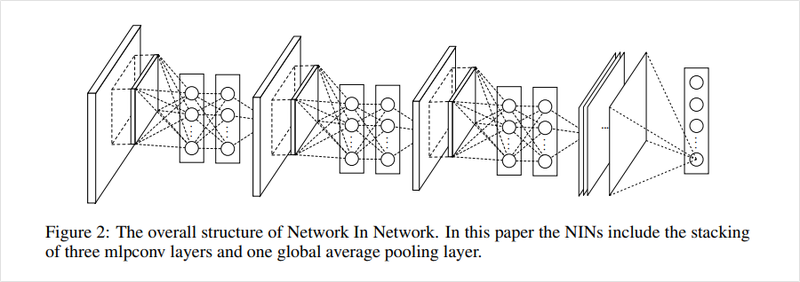

In [7]:
Image('./cam_4.png')

위 사진 역시 3개의 conv layer와 마지막 GAP layer으로 softmax activation함수로 각 클래스별 확률을 계산한다.

# CAM

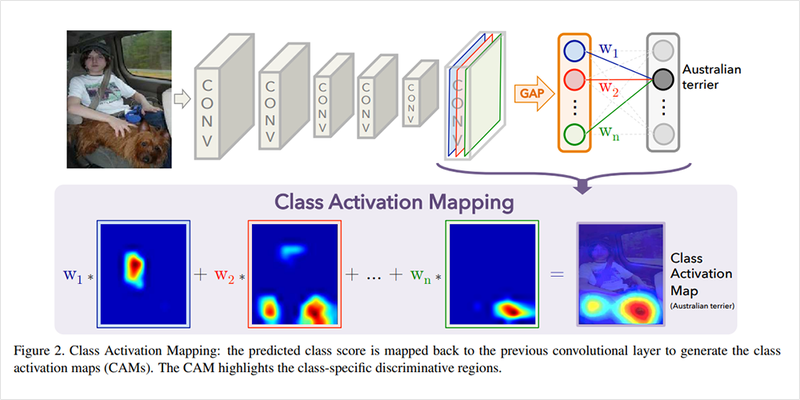

In [8]:
Image('./cam_5.png')

다시 cam으로 돌아와서 전체적인 network를 알아보자. 먼저 CNN Layer을 거쳐 뽑아낸 feature map에 대해 GAP를 적용한다. 이에 대해서 softmax layer을 적용한다. CNN을 거친 feature map에 각 class에 대한 정보는 여러 channel에 걸쳐 나타낸다. softmax layer은 이전 class에 대한 개별channel의 중요도를 결정한다. 각 class의 가중합을 구하면 활성화 맵의 어떤 부분을 주로 활성화 시키는 지 확인할 수 있다.

이렇게 얻은 Feature map을 interpolation해 적절히 원본 이미지로 확대해주면 해당 image에 대한 CAM을 얻을 수 있다.

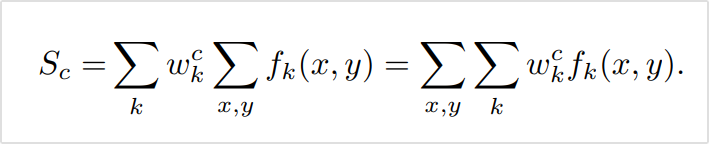

In [3]:
Image('./cam_6.png')

여기서 fk(x,y)는 k번쨰 채널의 x,y좌표의 활성화 값입니다. wck는 k번째 채널에 대해서 각 클래스 c노드의 가중치 값입니다.

위 두 값을 곱하고 모든 채널에 x,y축을 더해 줌으로써 클래스별 점수 Ac를 구할 수 있습니다.